In [1]:
from bdb import bar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = {
    "order_id": [101,102,103,104,105,106,107,108,109,110,111,112],
    "customer_name": ["Ali","Sara","Omar","Lina","Youssef","Mona","Khaled","Nour","Hassan","Ali","Sara",None],
    "city": ["Cairo","Alex","Cairo","Giza","Cairo","Alex","Giza","Cairo","Alex","Giza",None,"Cairo"],
    "product": ["Laptop","Phone","Tablet","Laptop","Phone","Tablet","Laptop","Phone","Tablet","Laptop","Phone","Laptop"],
    "price": [15000,8000,6000,15000,8000,6000,15000,8000,np.nan,15000,8000,15000],
    "quantity": [1,2,1,1,3,2,1,np.nan,2,1,1,1],
    "order_date": pd.to_datetime([
        "2024-01-05","2024-01-07","2024-01-10","2024-02-01",
        "2024-02-03","2024-02-10","2024-03-05","2024-03-08",
        "2024-03-15","2024-04-01","2024-04-07","2024-04-10"
    ])
}

df = pd.DataFrame(data)

In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       12 non-null     int64         
 1   customer_name  11 non-null     str           
 2   city           11 non-null     str           
 3   product        12 non-null     str           
 4   price          11 non-null     float64       
 5   quantity       11 non-null     float64       
 6   order_date     12 non-null     datetime64[us]
dtypes: datetime64[us](1), float64(2), int64(1), str(3)
memory usage: 804.0 bytes


In [3]:
df.describe()

,order_id,price,quantity,order_date
count,12.000000,11.000000,11.000000,12
mean,106.500000,10818.181818,1.454545,2024-02-21 08:00:00
min,101.000000,6000.000000,1.000000,2024-01-05 00:00:00
25%,103.750000,8000.000000,1.000000,2024-01-26 12:00:00
50%,106.500000,8000.000000,1.000000,2024-02-22 00:00:00
75%,109.250000,15000.000000,2.000000,2024-03-19 06:00:00
max,112.000000,15000.000000,3.000000,2024-04-10 00:00:00
std,3.605551,4069.844759,0.687552,NaN


In [4]:
df.isna().sum()

order_id         0
customer_name    1
city             1
product          0
price            1
quantity         1
order_date       0
dtype: int64

In [5]:
df["price"] = df["price"].fillna(df["price"].median())

In [6]:
df["quantity"] = df["quantity"].fillna(df["quantity"].median())

In [7]:
df["customer_name"] = df["customer_name"].fillna("unknown")

In [8]:
df["city"] = df["city"].fillna(df["city"].mode()[0])

In [9]:
df.isna().sum()

order_id         0
customer_name    0
city             0
product          0
price            0
quantity         0
order_date       0
dtype: int64

In [10]:
df["total_amount"]=df["price"]*df["quantity"]

In [11]:
df["month"]=df["order_date"].dt.month

In [12]:
df["month"]

0     1
1     1
2     1
3     2
4     2
5     2
6     3
7     3
8     3
9     4
10    4
11    4
Name: month, dtype: int32

In [13]:
df["quantity"].sum()

np.float64(17.0)

In [14]:
df.loc[df["total_amount"].idxmax()]

order_id                         105
customer_name                Youssef
city                           Cairo
product                        Phone
price                         8000.0
quantity                         3.0
order_date       2024-02-03 00:00:00
total_amount                 24000.0
month                              2
Name: 4, dtype: object

In [15]:
monthly_sales = df.groupby("month")["total_amount"].sum()

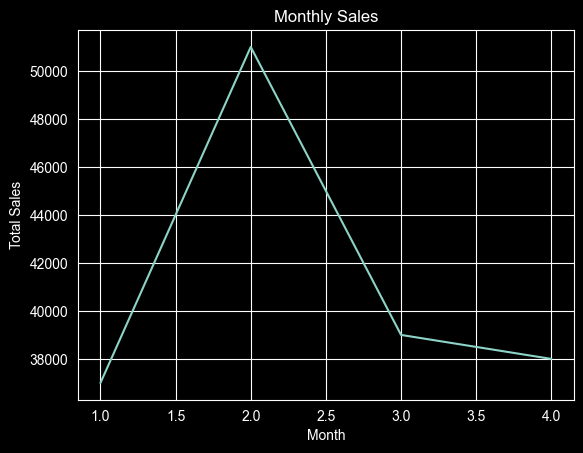

In [16]:
plt.plot(monthly_sales.index, monthly_sales.values)
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [17]:
monthly_sales2 = df.groupby("product")["total_amount"].sum()

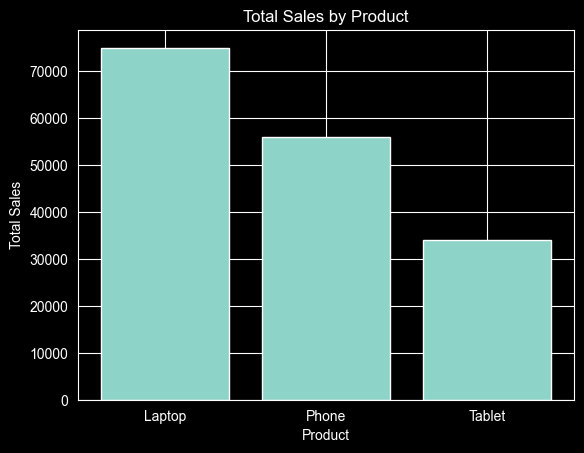

In [18]:
plt.bar(monthly_sales2.index, monthly_sales2.values)
plt.title("Total Sales by Product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.show()